# Importing Required Packages

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

Importing the CSV Data as Pandas DataFrame 

In [2]:
df = pd.read_csv(r'C:\Users\pulki\mlproject\notebook\data\raw.csv')
df.head()

,gender,race_ethnicity,parental_level_degree,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,completed,78,82,80
1,male,group C,some college,free,none,65,67,64
2,female,group A,associate's degree,standard,completed,88,90,89
3,male,group D,high school,free,none,52,55,53
4,female,group C,master's degree,standard,completed,90,92,91


Shape of the dataset

In [3]:
df.shape

(10, 8)

# Dataset Information

- gender: gender of the student (male, female)

- race_ethnicity: ethnicity group of the student (Group A, B, C, D, E)

- parental_level_degree: highest education level of the student’s parent

- lunch: type of lunch received (standard, free)

- test_preparation: test preparation course status (completed, none)

- math_score: mathematics exam score

- reading_score: reading exam score

- writing_score: writing exam score

# Data Cleaning
1. Checking Missing Values

In [4]:
df.isna().sum()

gender                   0
race_ethnicity           0
parental_level_degree    0
lunch                    0
test_preparation         0
math_score               0
reading_score            0
writing_score            0
dtype: int64

2. Checking Duplicates

In [5]:
df.duplicated().sum()

np.int64(0)

No duplicate values in the dataset

3. Checking data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 10 non-null     object
 1   race_ethnicity         10 non-null     object
 2   parental_level_degree  10 non-null     object
 3   lunch                  10 non-null     object
 4   test_preparation       10 non-null     object
 5   math_score             10 non-null     int64 
 6   reading_score          10 non-null     int64 
 7   writing_score          10 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 772.0+ bytes


4. Describing the data's statistics

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,10.000000,10.000000,10.00000
mean,73.100000,75.600000,74.10000
std,12.449453,12.491775,12.76671
min,52.000000,55.000000,53.00000
25%,65.750000,67.750000,65.25000
50%,72.500000,75.000000,73.50000
75%,83.250000,86.500000,85.25000
max,90.000000,92.000000,91.00000


5. Checking the number of unique values of each column

In [8]:
df.nunique()

gender                    2
race_ethnicity            5
parental_level_degree     6
lunch                     2
test_preparation          2
math_score               10
reading_score            10
writing_score            10
dtype: int64

# Insights:
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

6. Exploring data

In [9]:
df.head()

,gender,race_ethnicity,parental_level_degree,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,completed,78,82,80
1,male,group C,some college,free,none,65,67,64
2,female,group A,associate's degree,standard,completed,88,90,89
3,male,group D,high school,free,none,52,55,53
4,female,group C,master's degree,standard,completed,90,92,91


In [10]:

print("Categories in 'gender' variable:",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_degree' variable:",end=" " )
print(df['parental_level_degree'].unique())

print("Categories in 'lunch' variable:",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation' variable:",end=" " )
print(df['test_preparation'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_degree' variable: ["bachelor's degree" 'some college' "associate's degree" 'high school'
 "master's degree" 'some high school']
Categories in 'lunch' variable: ['standard' 'free']
Categories in 'test preparation' variable: ['completed' 'none']


7. defining numerical & categorical features

In [11]:
numerical_features= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features= [feature for feature in df.columns if df[feature].dtype == 'O']

#printing numerical and categorical features
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_degree', 'lunch', 'test_preparation']


8. Adding columns for "Total Score" and "Average"

In [12]:
df['total_score']= df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score']= df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_degree,lunch,test_preparation,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,completed,78,82,80,240,80.000000
1,male,group C,some college,free,none,65,67,64,196,65.333333
2,female,group A,associate's degree,standard,completed,88,90,89,267,89.000000
3,male,group D,high school,free,none,52,55,53,160,53.333333
4,female,group C,master's degree,standard,completed,90,92,91,273,91.000000


In [13]:
reading_full= df[df['reading_score']== 100]['average_score'].count()
writing_full= df[df['writing_score']== 100]['average_score'].count()
maths_full= df[df['math_score']== 100]['average_score'].count()

print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in maths: {maths_full}')

Number of students with full marks in reading: 0
Number of students with full marks in writing: 0
Number of students with full marks in maths: 0


In [14]:
reading_less_20 = df[df['reading_score'] <= 70]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 70]['average_score'].count()
math_less_20 = df[df['math_score'] <= 70]['average_score'].count()

print(f'Number of students with less than 70 marks in Maths: {math_less_20}')
print(f'Number of students with less than 70 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 70 marks in Reading: {reading_less_20}')

Number of students with less than 70 marks in Maths: 5
Number of students with less than 70 marks in Writing: 4
Number of students with less than 70 marks in Reading: 4


# Insights
- A higher number of students scored below 70 in Mathematics (5 students) compared to Reading and Writing, indicating that Mathematics is the most challenging subject for students.
- Reading and Writing show similar performance, with 4 students each scoring below 70, suggesting comparable difficulty levels in these subjects.
- Overall, students tend to perform better in language-based subjects (Reading and Writing) than in Mathematics.
- Academic support or targeted intervention may be more necessary for Mathematics to improve overall student performance.

# Exploring Data ( Visualization )
Visualizinge average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

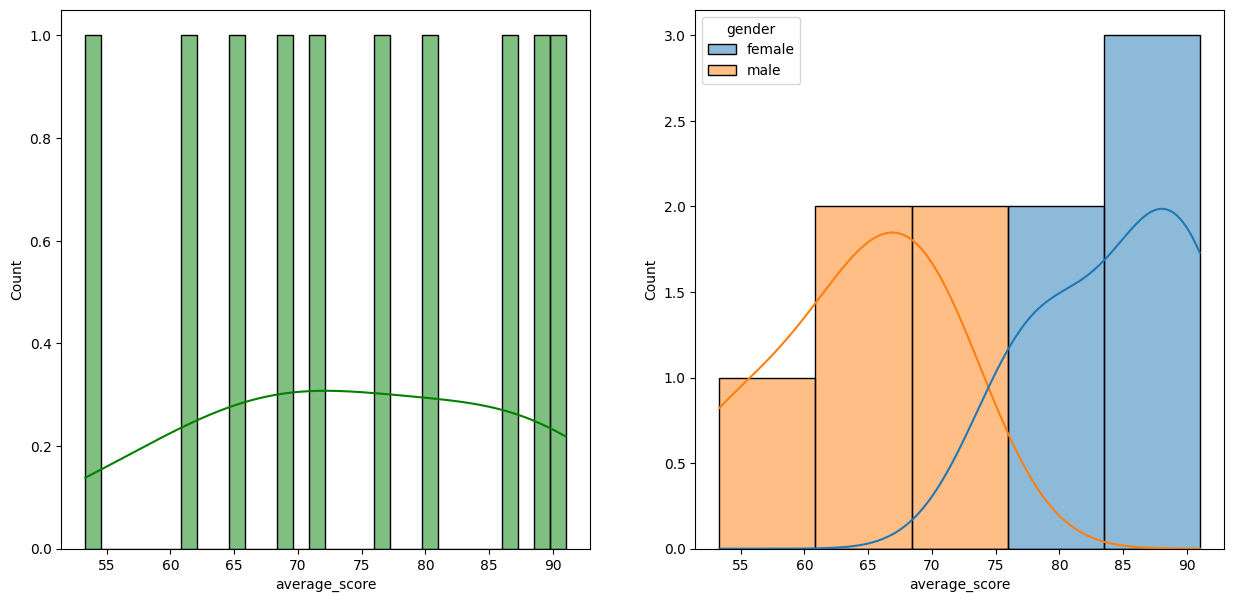

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.show()

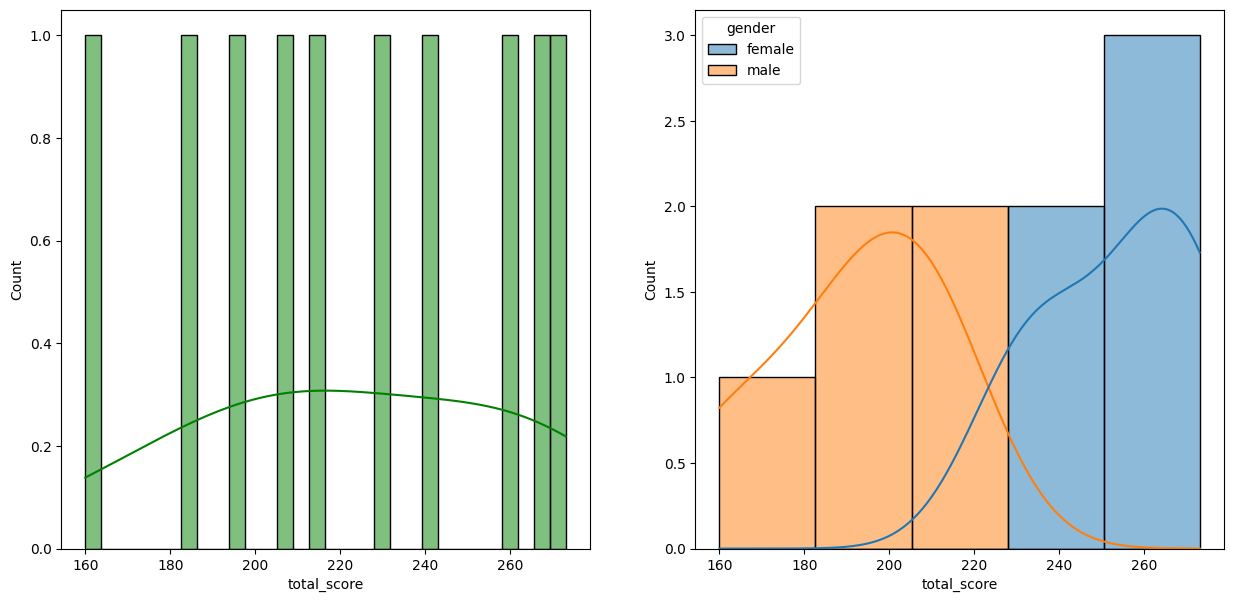

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score', kde=True, hue='gender')
plt.show()

Insights
- Female students tend to perform well than male students.

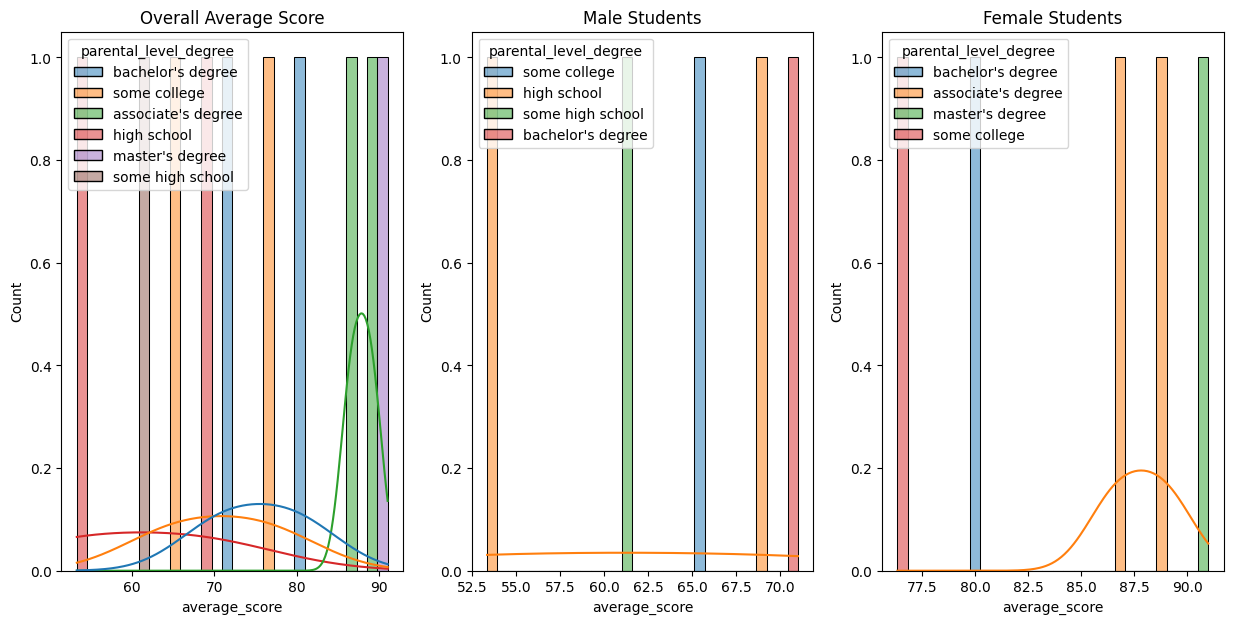

In [17]:
plt.subplots(1,3,figsize= (15,7))

plt.subplot(131)
sns.histplot(data= df, x= 'average_score', bins=30, kde= True, hue= 'parental_level_degree')
plt.title("Overall Average Score")

plt.subplot(132)
sns.histplot(data= df[df.gender== 'male'], x= 'average_score', bins= 30, kde= True, hue= 'parental_level_degree')
plt.title("Male Students")

plt.subplot(133)
sns.histplot(data= df[df.gender== 'female'], x= 'average_score', bins= 30, kde= True, hue= 'parental_level_degree')
plt.title("Female Students")

plt.show()

Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

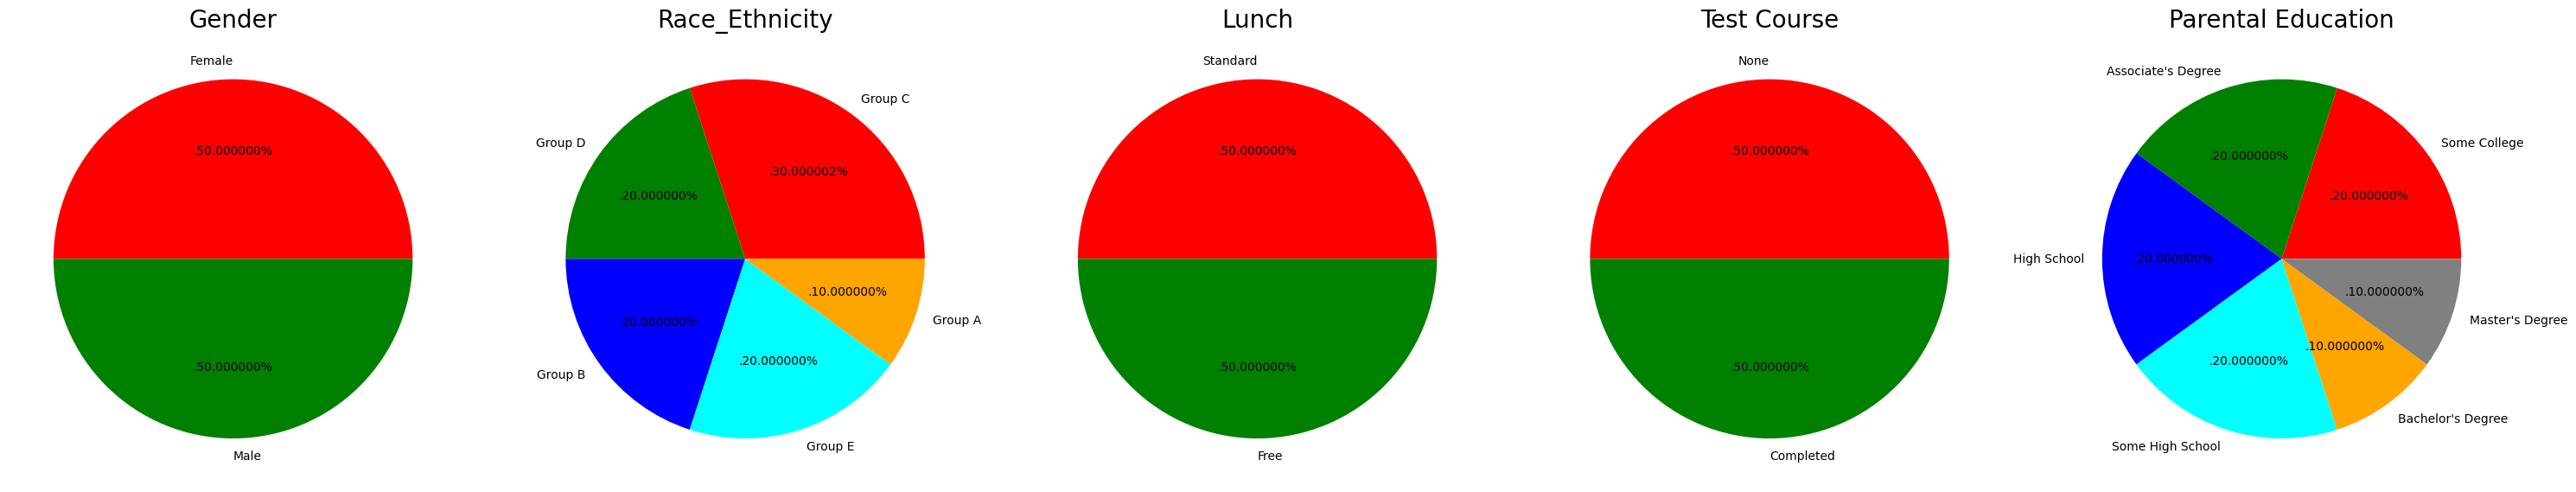

In [18]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_degree'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights
- Gender: Female and male students are equally represented.
- Lunch: Students with standard lunch and free lunch are equal in number.
- Test Preparation Course: Equal proportion of students completed and did not complete the course.
- Race/Ethnicity: Students are unevenly distributed across ethnic groups, with some groups having higher representation.
- Parental Education: Most parents fall under some college / associate’s degree, while master’s degree is least common.

Feature Wise Visualization

GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

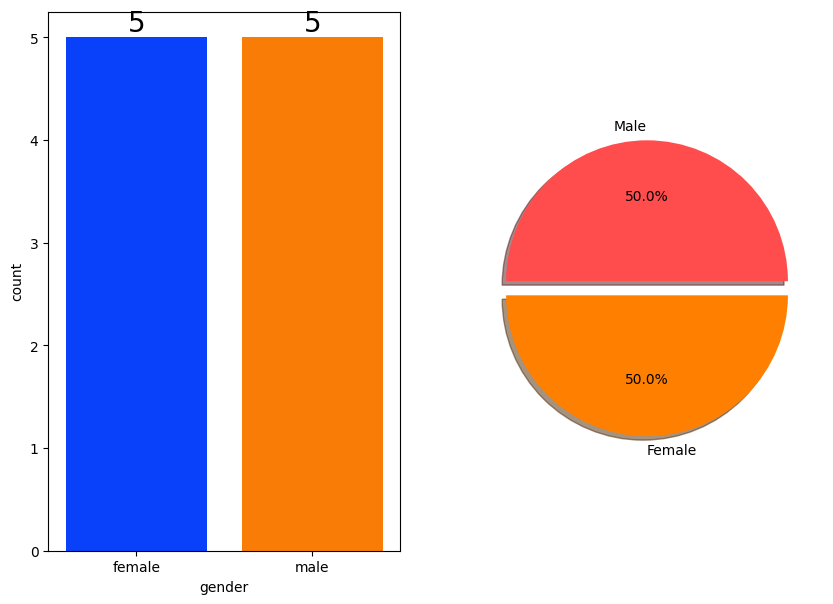

In [19]:
f,ax=plt.subplots(1,2,figsize=(10,7))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
- Gender has balanced data with female students are 5 (50%) and male students are 5 (50%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [20]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,83.2,86.0,84.6,253.8,84.600000
male,63.0,65.2,63.6,191.8,63.933333


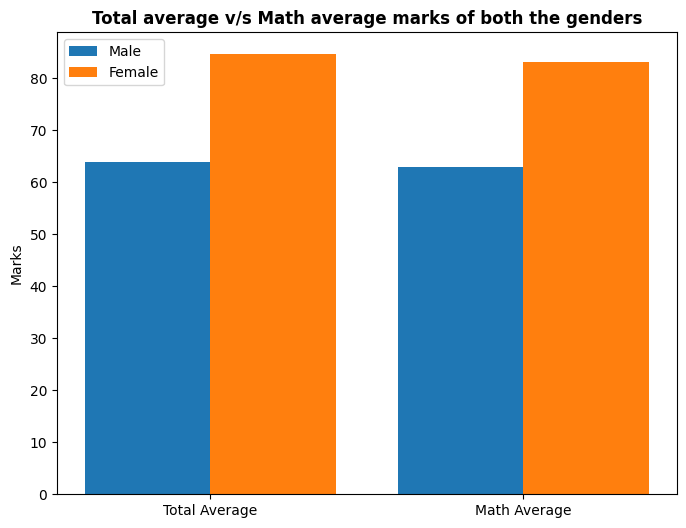

In [21]:
plt.figure(figsize=(8, 6))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

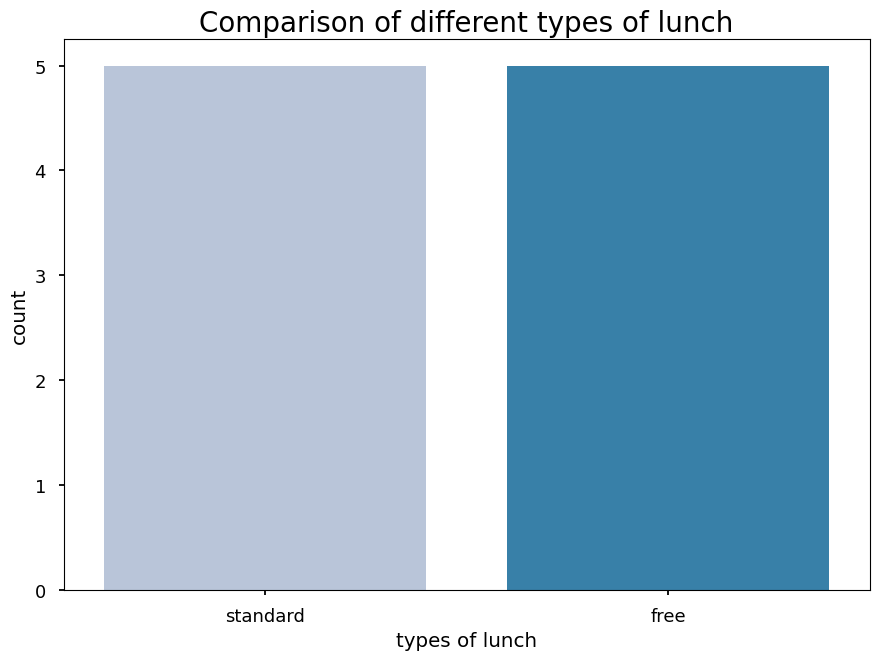

In [22]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(x= 'lunch', data= df, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


Insights
- Students being served Standard lunch were equal to that of free lunch

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

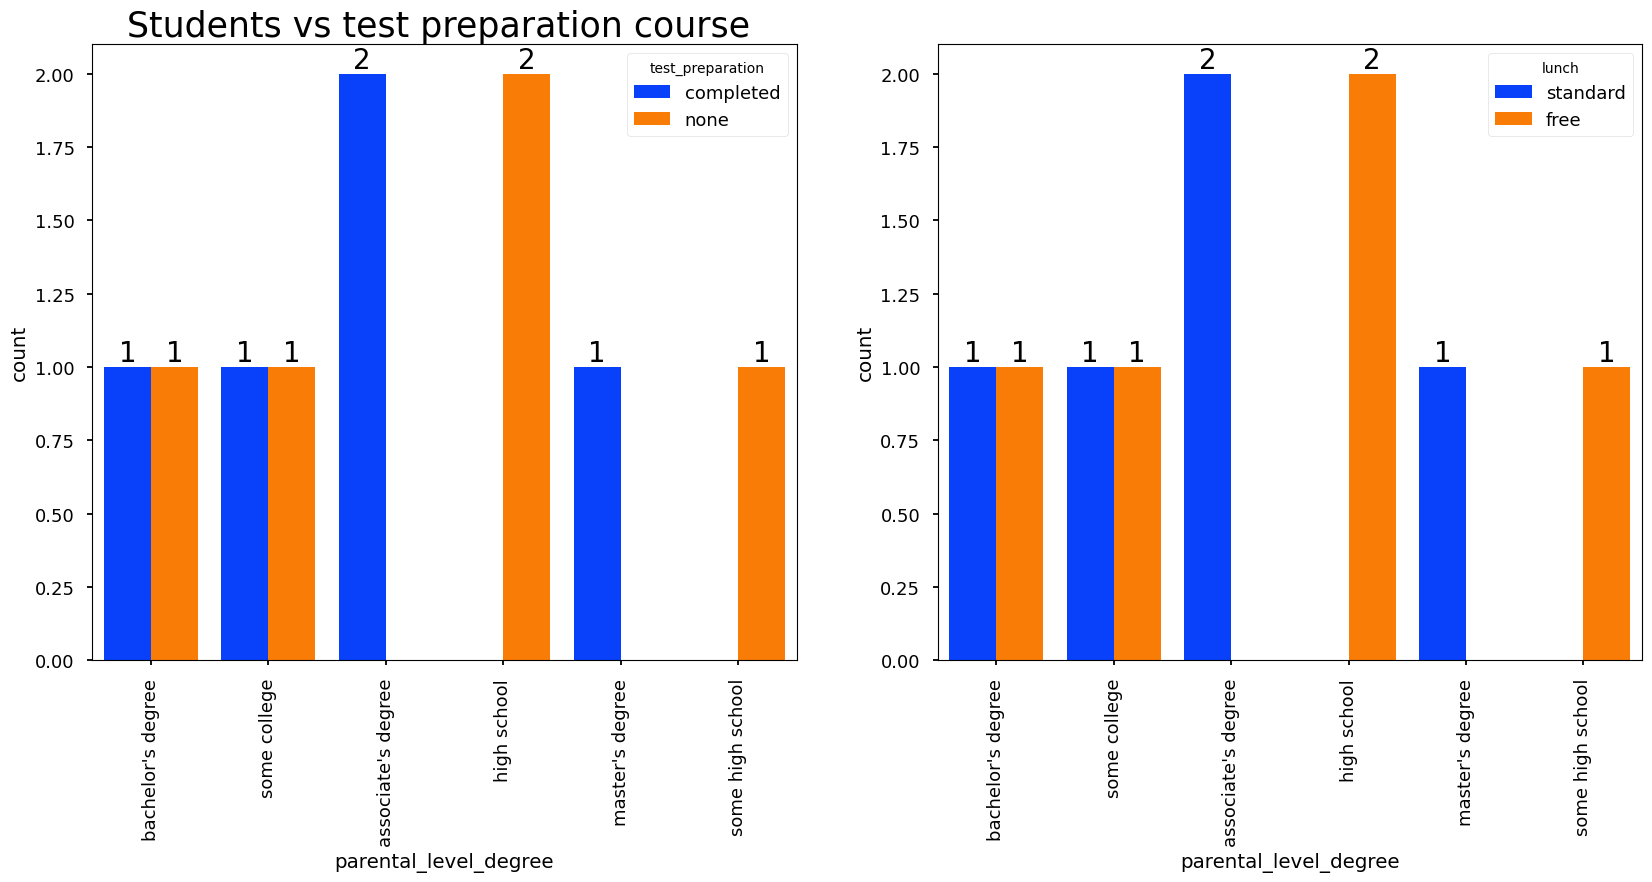

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_degree'],data=df,palette = 'bright',hue='test_preparation',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_degree'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Insights
- Students with standard lunch tend to perform better on average than those with free lunch, indicating a positive link between lunch type and academic performance.

# Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.